In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Muat dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Pre-Processing
# Tambahkan dimensi channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_tst = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalisasi
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /255

# Ubah label menjadi one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(f"Bentuk data latih: {x_train.shape}")
print(f"Bentuk label latih: {y_train.shape}")
print(f"Bentuk data uji: {x_test.shape}")
print(f"Bentuk label uji: {y_test.shape}")

Bentuk data latih: (60000, 28, 28, 1)
Bentuk label latih: (60000, 10)
Bentuk data uji: (10000, 28, 28)
Bentuk label uji: (10000, 10)


In [ ]:
# Bangun model CNN
model = Sequential()

# Lapisan Konvolusi Pertama
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))

# Lapisan polling pertama
model.add(MaxPooling2D(pool_size=(2,2)))

# Lapisan Konvolusi Kedua
model.add(Conv2D(65, kernel_size=(3,3), activation='relu'))

# Lapisan Polling Kedua
model.add(MaxPooling2D(pool_size=(2,2)))

# Lapisan Flatten (Meratakan output dair lapisan pooling)
model.add(Flatten())

# Lapisan Fully Connected Pertama
model.add(Dense(128, activation='relu'))

# Lapisan Fully Connected Kedua (Output Layer)
model.add(Dense(num_classes, activation='softmax'))

# Kompilasi Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Tampilkan Ringkasan model
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 65)     │        18,785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 65)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1625)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       208,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228,523 (892.67 KB)

 Trainable params: 228,523 (892.67 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Latih
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 94ms/step - accuracy: 0.8583 - loss: 0.4764 - val_accuracy: 0.9708 - val_loss: 0.0882
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 96ms/step - accuracy: 0.9812 - loss: 0.0623 - val_accuracy: 0.9839 - val_loss: 0.0484
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.9882 - loss: 0.0412 - val_accuracy: 0.9876 - val_loss: 0.0409
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9912 - loss: 0.0294 - val_accuracy: 0.9913 - val_loss: 0.0264
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 93ms/step - accuracy: 0.9929 - loss: 0.0217 - val_accuracy: 0.9924 - val_loss: 0.0240
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9950 - loss: 0.0169 - val_accuracy: 0.9908 - val_loss: 0.0279
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 95ms/step - accuracy: 0.9953 - loss: 0.0150 - val_accuracy: 0.9919 - val_loss: 0.0281
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.9966 - loss: 0.0108 - 

Test Loss: 0.035401295870542526
Test Accuracy: 0.9890000224113464


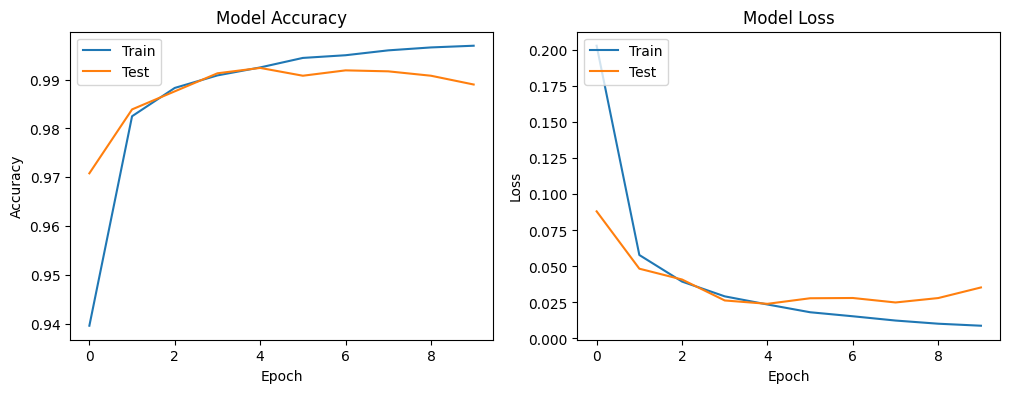

In [ ]:
# Evaluasi
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

# Plot akurasi dan loss selama pelatihan
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

